<a href="https://colab.research.google.com/github/oleksii-shcherbak/GoIt-Math/blob/main/%D0%94%D0%976_%D0%A9%D0%B5%D1%80%D0%B1%D0%B0%D0%BA_%D0%9E%D0%BB%D0%B5%D0%BA%D1%81%D1%96%D0%B9_%D0%86%D0%B3%D0%BE%D1%80%D0%BE%D0%B2%D0%B8%D1%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Опис домашнього завдання

Ти замовив/-ла виконання дослідження ефективності роботи співробітників і отримав/-ла наближену залежність ефективності роботи (кількість тасків за одиницю часу) від часу доби, за умови, що завдання однакові за складністю.

$$
2 \left( \frac{4}{1.2 \sqrt{2\pi}} e^{ -\frac{1}{2} \left( \frac{x - 11}{1.2} \right)^2 } + \frac{7}{2.4 \sqrt{2\pi}} e^{ -\frac{1}{2} \left( \frac{x - 15}{2.4} \right)^2 } \right)
$$



Позначимо початок і кінець робочого дня як \( a = 9 \) та \( b = 18 \) відповідно.

Тобі буде потрібно порахувати середню кількість тасків, виконаних упродовж робочого дня (в робочі години з 9 до 18).

---

# Завдання 1

Візуалізуй функцію на відрізку від 0 до 24. За допомогою SymPy порахуй невизначений інтеграл функції та інтеграл від \( a \) до \( b \).

---

# Завдання 2

Напиши функцію чисельного інтегрування методом прямокутників та порахуй інтеграл від \( a \) до \( b \).

---

# Завдання 3

Напиши функцію чисельного інтегрування методом трапецій та порахуй інтеграл від \( a \) до \( b \).

---

# Завдання 4

Напиши функцію чисельного інтегрування методом Сімпсона та порахуй інтеграл від \( a \) до \( b \).

---

# Завдання 5

Порахуй інтеграл від \( a \) до \( b \) за допомогою функції `scipy.integrate.quad`.



--- Task 1.1: Visualization ---


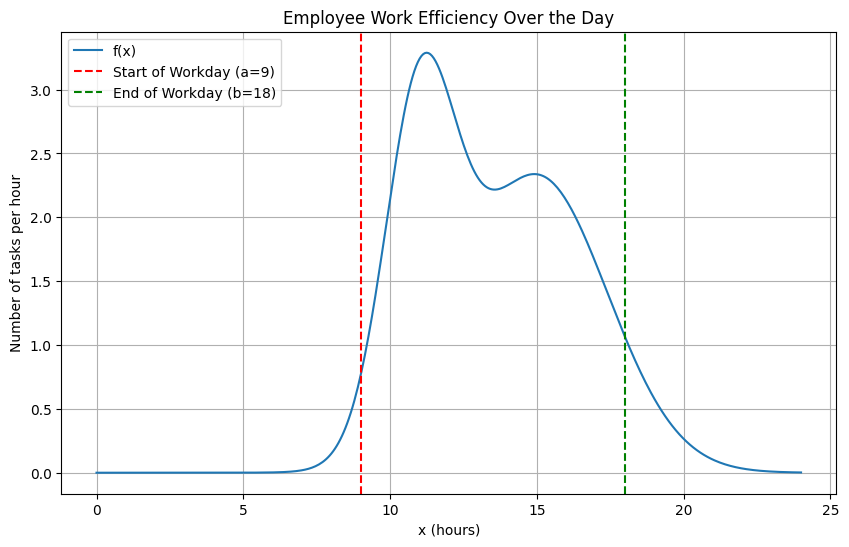


--- Task 1.2: Indefinite Integral (SymPy) ---
Indefinite integral (symbolic):
4.94974746830583*sqrt(2)*erf(0.294627825494395*x - 4.41941738241592) + 2.82842712474619*sqrt(2)*erf(0.58925565098879*x - 6.48181216087669)

--- Task 1.3: Definite Integral from a to b (SymPy) ---
Definite integral from 9 to 18 (symbolic): 14.178654163478*sqrt(2)
Numerical value: 20.051645014188296

--- Task 2: Rectangle Method ---
Rectangle method result from 9 to 18: 20.05028422526576

--- Task 3: Trapezoidal Method ---
Trapezoidal method result from 9 to 18: 20.051634332194123

--- Task 4: Simpson's Method ---
Simpson's method result from 9 to 18: 20.051645014196353

--- Task 5: SciPy integrate.quad ---
SciPy quad result from 9 to 18: 20.051645014188296 (error estimate: 1.2672390114804206e-11)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, exp, sqrt, pi, integrate
from scipy import integrate as sci_integrate

# Define symbolic variable
x = symbols('x')

# Define the function symbolically
term1 = (4 / (1.2 * sqrt(2 * pi))) * exp(-0.5 * ((x - 11) / 1.2)**2)
term2 = (7 / (2.4 * sqrt(2 * pi))) * exp(-0.5 * ((x - 15) / 2.4)**2)
f_sym = 2 * (term1 + term2)

# Define the numerical function
def f_num(x):
    term1_num = (4 / (1.2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 11) / 1.2)**2)
    term2_num = (7 / (2.4 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 15) / 2.4)**2)
    return 2 * (term1_num + term2_num)

# Integration limits
a = 9
b = 18

# Task 1.1: Visualization of the function
print("\n--- Task 1.1: Visualization ---")
x_vals = np.linspace(0, 24, 400)
y_vals = f_num(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x)')
plt.xlabel('x (hours)')
plt.ylabel('Number of tasks per hour')
plt.title('Employee Work Efficiency Over the Day')
plt.grid(True)
plt.axvline(a, color='r', linestyle='--', label=f'Start of Workday (a={a})')
plt.axvline(b, color='g', linestyle='--', label=f'End of Workday (b={b})')
plt.legend()
plt.show()

# Task 1.2: Indefinite integral using SymPy
print("\n--- Task 1.2: Indefinite Integral (SymPy) ---")
integral_indefinite = integrate(f_sym, x)
print(f"Indefinite integral (symbolic):\n{integral_indefinite}")

# Task 1.3: Definite integral from a to b using SymPy
print("\n--- Task 1.3: Definite Integral from a to b (SymPy) ---")
integral_definite_sympy = integrate(f_sym, (x, a, b))
print(f"Definite integral from {a} to {b} (symbolic): {integral_definite_sympy}")
print(f"Numerical value: {float(integral_definite_sympy.evalf())}")

# Task 2: Numerical integration using rectangle method
print("\n--- Task 2: Rectangle Method ---")
def integrate_rectangle(func, a, b, n=1000):
    h = (b - a) / n
    integral = 0
    for i in range(n):
        integral += func(a + i * h) * h  # Left Riemann sum
    return integral

integral_rectangle_result = integrate_rectangle(f_num, a, b)
print(f"Rectangle method result from {a} to {b}: {integral_rectangle_result}")

# Task 3: Numerical integration using trapezoidal method
print("\n--- Task 3: Trapezoidal Method ---")
def integrate_trapezoidal(func, a, b, n=1000):
    h = (b - a) / n
    integral = 0.5 * (func(a) + func(b))
    for i in range(1, n):
        integral += func(a + i * h)
    integral *= h
    return integral

integral_trapezoidal_result = integrate_trapezoidal(f_num, a, b)
print(f"Trapezoidal method result from {a} to {b}: {integral_trapezoidal_result}")

# Task 4: Numerical integration using Simpson's method
print("\n--- Task 4: Simpson's Method ---")
def integrate_simpson(func, a, b, n=1000):
    if n % 2 != 0:
        raise ValueError("Number of intervals n must be even for Simpson's method.")
    h = (b - a) / n
    integral = func(a) + func(b)
    for i in range(1, n, 2):
        integral += 4 * func(a + i * h)
    for i in range(2, n - 1, 2):
        integral += 2 * func(a + i * h)
    integral *= h / 3
    return integral

try:
    integral_simpson_result = integrate_simpson(f_num, a, b)
    print(f"Simpson's method result from {a} to {b}: {integral_simpson_result}")
except ValueError as e:
    print(f"Error in Simpson's method: {e}")

# Task 5: Integration using scipy.integrate.quad
print("\n--- Task 5: SciPy integrate.quad ---")
integral_scipy, error = sci_integrate.quad(f_num, a, b)
print(f"SciPy quad result from {a} to {b}: {integral_scipy} (error estimate: {error})")